# make classifcation data and get it ready 

In [175]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

len(X), len(y)

(1000, 1000)

In [176]:
print(f"First 5 of X:\n {X[:5]}")
print(f"First 5 of y:\n {y[:5]}")

First 5 of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 of y:
 [1 1 1 1 0]


In [177]:
import pandas as pd 

circles = pd.DataFrame({"X1": X[:, 0],  
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


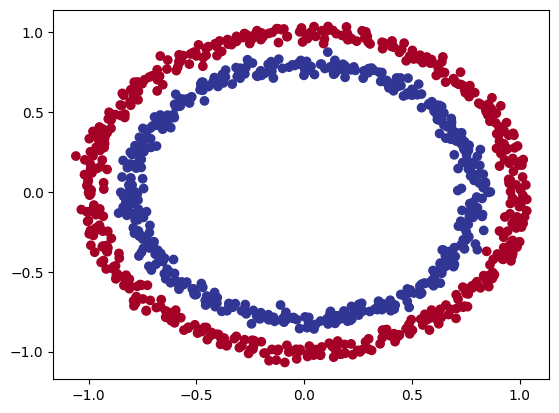

In [178]:
import matplotlib.pyplot as plt 

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [179]:
X.shape, y.shape

((1000, 2), (1000,))

In [180]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [181]:
X_sample = X[0]
y_sample = y[0]

X_sample, y_sample

(array([0.75424625, 0.23148074]), 1)

In [182]:
import torch

In [183]:

type(X)

numpy.ndarray

In [184]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [185]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [187]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [188]:
n_samples

1000

In [189]:
import torch 
from torch import nn 

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [190]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [191]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
    
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [192]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [193]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5), 
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [194]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [195]:
untrained_preds = model_0(X_test.to(device))
len(untrained_preds), untrained_preds.shape

(200, torch.Size([200, 1]))

In [196]:
len(X_test), X_test.shape

(200, torch.Size([200, 2]))

In [197]:
untrained_preds[:10]

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0', grad_fn=<SliceBackward0>)

In [198]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [199]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [200]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc


In [201]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [202]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [203]:
y_pred_probs = torch.sigmoid(y_logits)

y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [204]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [205]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [206]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [207]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) 

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true = y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69796, Acc: 51.88 | Test Loss: 0.69440, Test Acc: 58.00
Epoch: 10 | Loss: 0.69590, Acc: 51.25 | Test Loss: 0.69305, Test Acc: 53.00
Epoch: 20 | Loss: 0.69490, Acc: 51.62 | Test Loss: 0.69254, Test Acc: 49.50
Epoch: 30 | Loss: 0.69435, Acc: 51.12 | Test Loss: 0.69236, Test Acc: 49.50
Epoch: 40 | Loss: 0.69401, Acc: 50.88 | Test Loss: 0.69232, Test Acc: 51.00
Epoch: 50 | Loss: 0.69378, Acc: 50.25 | Test Loss: 0.69234, Test Acc: 50.00
Epoch: 60 | Loss: 0.69362, Acc: 50.00 | Test Loss: 0.69239, Test Acc: 51.50
Epoch: 70 | Loss: 0.69351, Acc: 50.25 | Test Loss: 0.69246, Test Acc: 51.00
Epoch: 80 | Loss: 0.69342, Acc: 49.88 | Test Loss: 0.69254, Test Acc: 50.00
Epoch: 90 | Loss: 0.69336, Acc: 49.88 | Test Loss: 0.69262, Test Acc: 53.00
Epoch: 100 | Loss: 0.69331, Acc: 49.25 | Test Loss: 0.69271, Test Acc: 53.00
Epoch: 110 | Loss: 0.69327, Acc: 49.75 | Test Loss: 0.69279, Test Acc: 54.00
Epoch: 120 | Loss: 0.69324, Acc: 50.25 | Test Loss: 0.69286, Test Acc: 53.00
Epoch: 130

In [208]:
import requests 
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("already exists")
else: 
    print("this shouldnt print")
    request =  requests.get()
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


already exists


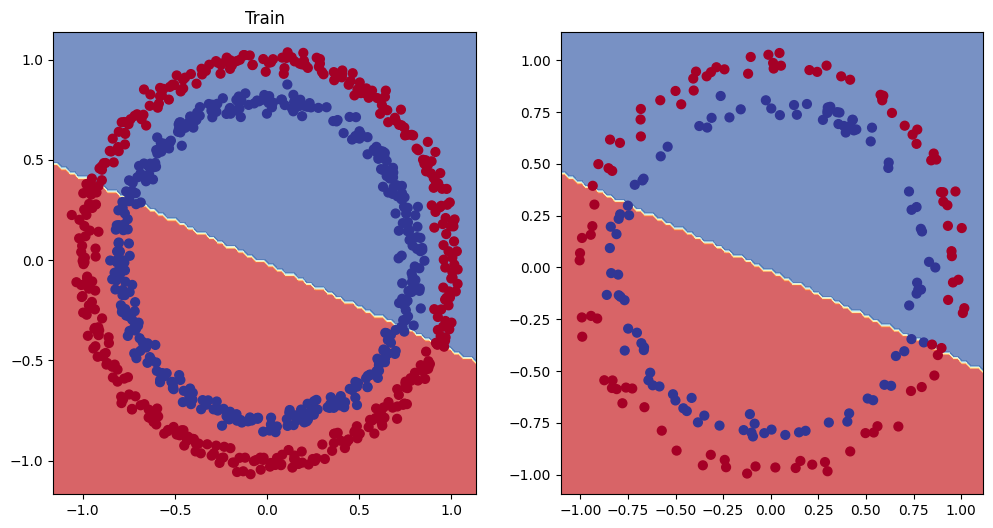

In [209]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plot_decision_boundary(model_0, X_test, y_test)

In [210]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [211]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [212]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69396, Acc: 50.88 | Test Loss: 0.69261, Test Acc: 51.00
Epoch: 10 | Loss: 0.69369, Acc: 50.25 | Test Loss: 0.69270, Test Acc: 50.00
Epoch: 20 | Loss: 0.69351, Acc: 50.12 | Test Loss: 0.69283, Test Acc: 49.50
Epoch: 30 | Loss: 0.69339, Acc: 50.50 | Test Loss: 0.69297, Test Acc: 48.00
Epoch: 40 | Loss: 0.69329, Acc: 50.38 | Test Loss: 0.69310, Test Acc: 49.00
Epoch: 50 | Loss: 0.69322, Acc: 49.88 | Test Loss: 0.69324, Test Acc: 50.00
Epoch: 60 | Loss: 0.69317, Acc: 49.38 | Test Loss: 0.69336, Test Acc: 51.50
Epoch: 70 | Loss: 0.69312, Acc: 49.38 | Test Loss: 0.69348, Test Acc: 50.50
Epoch: 80 | Loss: 0.69309, Acc: 50.12 | Test Loss: 0.69359, Test Acc: 50.00
Epoch: 90 | Loss: 0.69307, Acc: 50.50 | Test Loss: 0.69370, Test Acc: 48.50
Epoch: 100 | Loss: 0.69305, Acc: 50.38 | Test Loss: 0.69379, Test Acc: 48.00
Epoch: 110 | Loss: 0.69303, Acc: 50.88 | Test Loss: 0.69388, Test Acc: 46.50
Epoch: 120 | Loss: 0.69302, Acc: 50.75 | Test Loss: 0.69396, Test Acc: 46.50
Epoch: 130

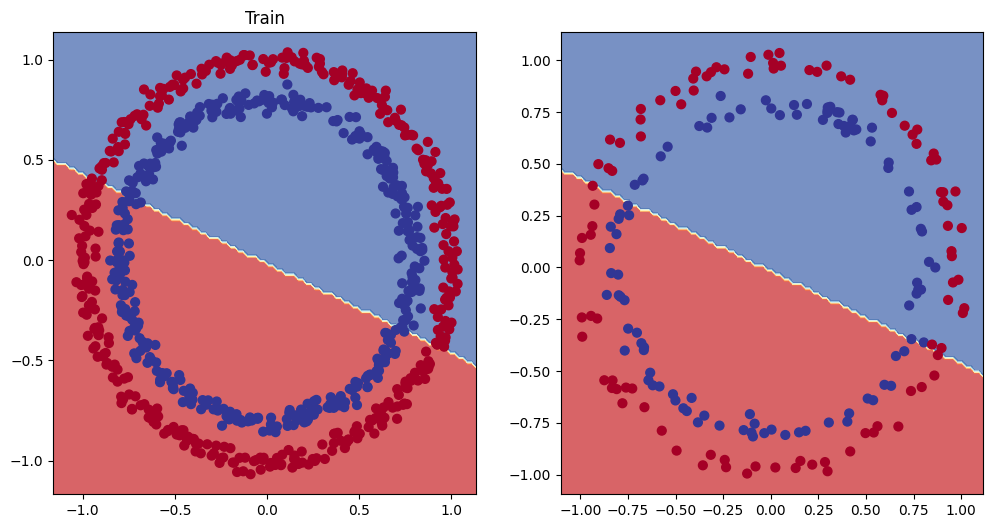

In [213]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plot_decision_boundary(model_1, X_test, y_test)

In [214]:
weight = 0.7 
bias = 0.3
start = 0
end = 1 
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [215]:
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

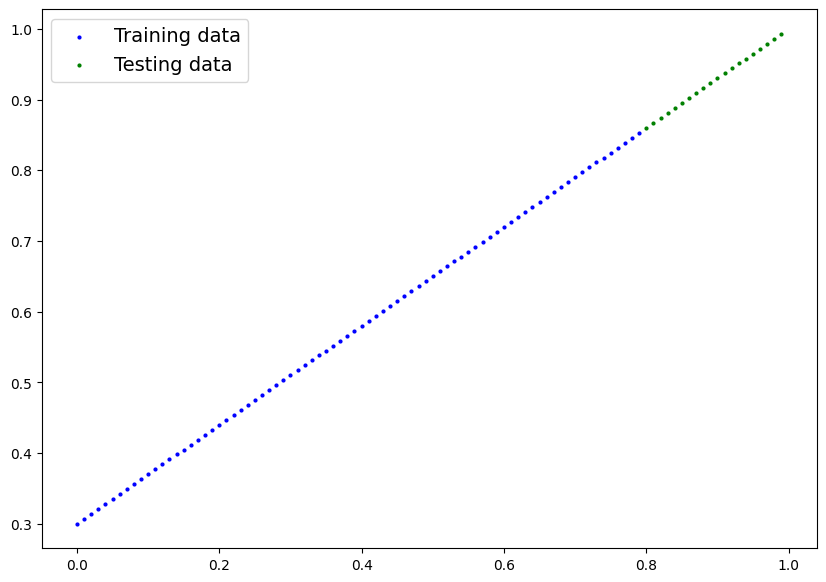

In [216]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data=X_test_regression, test_labels=y_test_regression)

In [217]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [218]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [219]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [220]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.75986, Acc: 51.00 | Test Loss: 0.91103, Test Acc: 46.00
Epoch: 100 | Loss: 0.02858, Acc: 51.00 | Test Loss: 0.00081, Test Acc: 46.00
Epoch: 200 | Loss: 0.02533, Acc: 51.00 | Test Loss: 0.00209, Test Acc: 46.00
Epoch: 300 | Loss: 0.02137, Acc: 51.00 | Test Loss: 0.00305, Test Acc: 46.00
Epoch: 400 | Loss: 0.01964, Acc: 51.00 | Test Loss: 0.00341, Test Acc: 46.00
Epoch: 500 | Loss: 0.01940, Acc: 51.00 | Test Loss: 0.00387, Test Acc: 46.00
Epoch: 600 | Loss: 0.01903, Acc: 51.00 | Test Loss: 0.00379, Test Acc: 46.00
Epoch: 700 | Loss: 0.01878, Acc: 51.00 | Test Loss: 0.00381, Test Acc: 46.00
Epoch: 800 | Loss: 0.01840, Acc: 51.00 | Test Loss: 0.00329, Test Acc: 46.00
Epoch: 900 | Loss: 0.01798, Acc: 51.00 | Test Loss: 0.00360, Test Acc: 46.00


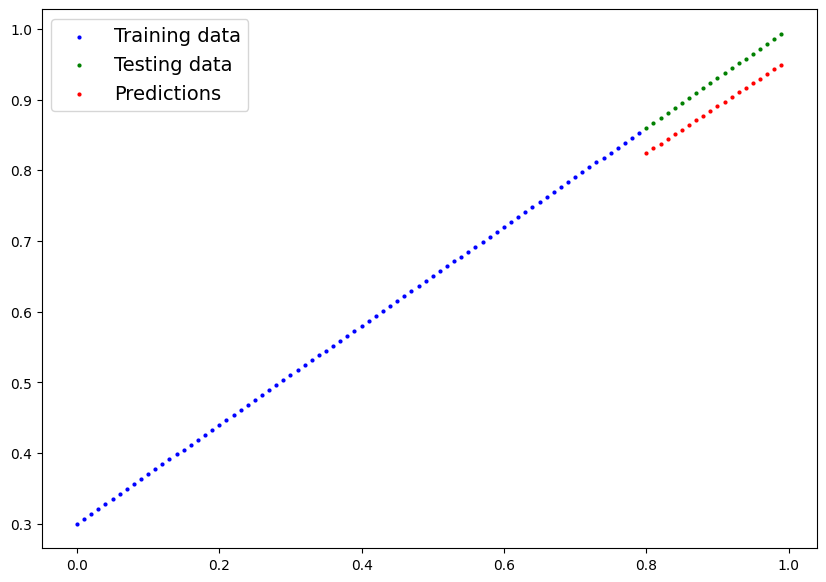

In [221]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(), train_labels=y_train_regression.cpu(), test_data=X_test_regression.cpu(), test_labels=y_test_regression.cpu(), predictions=y_preds.cpu())

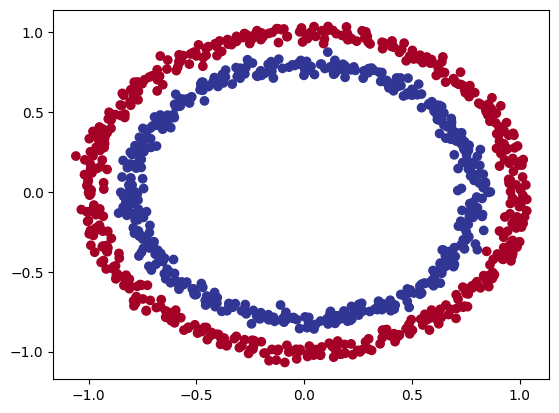

In [222]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [223]:
import torch 
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [224]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [225]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)


In [226]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_3.train()

    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_lost = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69295, Acc: 50.00 | Test Loss: 0.03951, Test Acc: 50.00
Epoch: 100 | Loss: 0.69115, Acc: 52.88 | Test Loss: 0.03951, Test Acc: 52.50
Epoch: 200 | Loss: 0.68977, Acc: 53.37 | Test Loss: 0.03951, Test Acc: 55.00
Epoch: 300 | Loss: 0.68795, Acc: 53.00 | Test Loss: 0.03951, Test Acc: 56.00
Epoch: 400 | Loss: 0.68517, Acc: 52.75 | Test Loss: 0.03951, Test Acc: 56.50
Epoch: 500 | Loss: 0.68102, Acc: 52.75 | Test Loss: 0.03951, Test Acc: 56.50
Epoch: 600 | Loss: 0.67515, Acc: 54.50 | Test Loss: 0.03951, Test Acc: 56.00
Epoch: 700 | Loss: 0.66659, Acc: 58.38 | Test Loss: 0.03951, Test Acc: 59.00
Epoch: 800 | Loss: 0.65160, Acc: 64.00 | Test Loss: 0.03951, Test Acc: 67.50
Epoch: 900 | Loss: 0.62362, Acc: 74.00 | Test Loss: 0.03951, Test Acc: 79.00


In [227]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

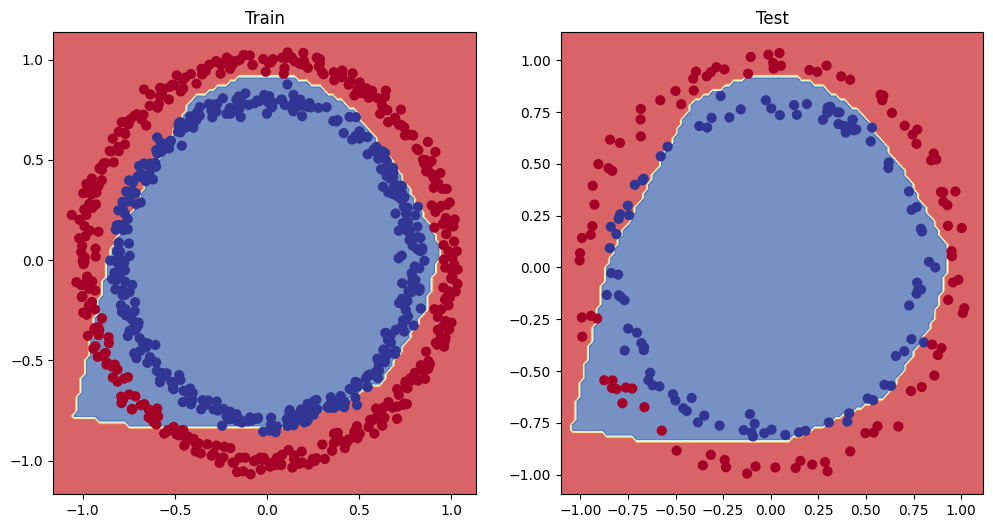

In [228]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [229]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

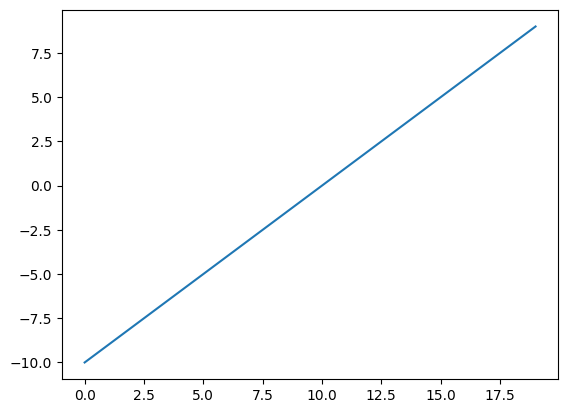

In [230]:
plt.plot(A)

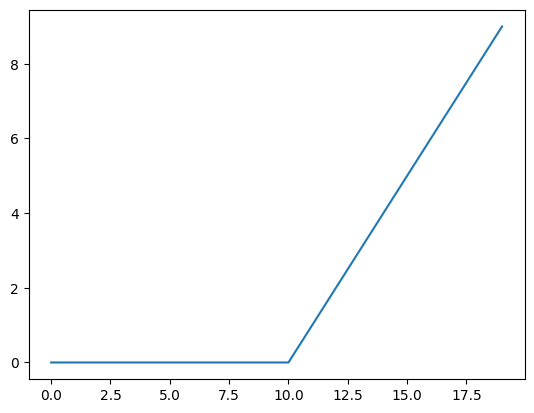

In [231]:
plt.plot(torch.relu(A))

In [232]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

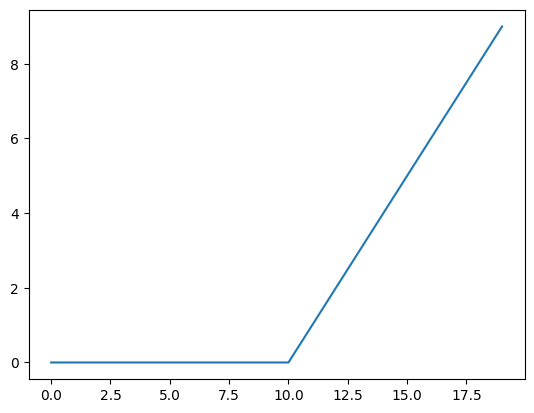

In [233]:
plt.plot(relu(A))

In [234]:
def sigmoid(x):
    return 1/(1 + torch.exp(-x))


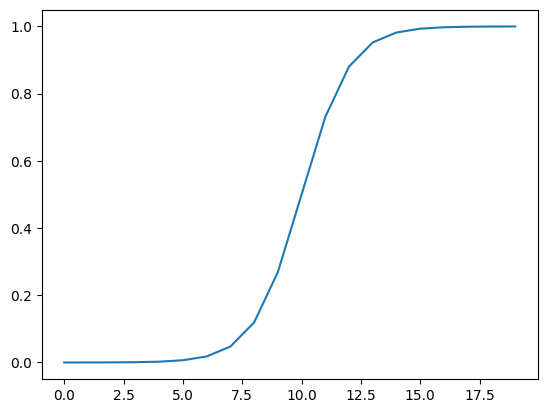

In [235]:
plt.plot(sigmoid(A))

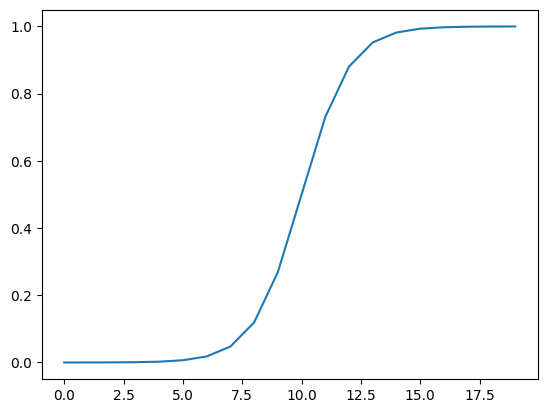

In [236]:
plt.plot(torch.sigmoid(A))

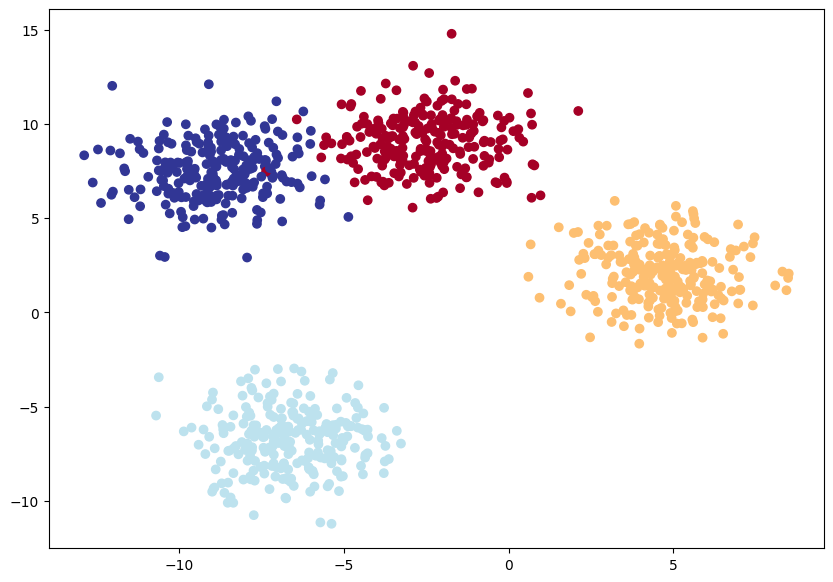

In [237]:
import torch 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4 
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [238]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [239]:
from torch import nn
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features))
    
    def forward(self, x):
        return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2, output_features=4).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [240]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

In [241]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [242]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [243]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)

    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_4.eval()

    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)  

    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.0432, Acc: 65.50 | Test Loss: 0.5786, Test Acc: 95.50
Epoch: 10 | Loss: 0.1440, Acc: 99.12 | Test Loss: 0.1304, Test Acc: 99.00
Epoch: 20 | Loss: 0.0806, Acc: 99.12 | Test Loss: 0.0722, Test Acc: 99.50
Epoch: 30 | Loss: 0.0592, Acc: 99.12 | Test Loss: 0.0513, Test Acc: 99.50
Epoch: 40 | Loss: 0.0489, Acc: 99.00 | Test Loss: 0.0410, Test Acc: 99.50
Epoch: 50 | Loss: 0.0429, Acc: 99.00 | Test Loss: 0.0349, Test Acc: 99.50
Epoch: 60 | Loss: 0.0391, Acc: 99.00 | Test Loss: 0.0308, Test Acc: 99.50
Epoch: 70 | Loss: 0.0364, Acc: 99.00 | Test Loss: 0.0280, Test Acc: 99.50
Epoch: 80 | Loss: 0.0345, Acc: 99.00 | Test Loss: 0.0259, Test Acc: 99.50
Epoch: 90 | Loss: 0.0330, Acc: 99.12 | Test Loss: 0.0242, Test Acc: 99.50


In [244]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [245]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3698e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2267e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5436e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4288e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9938e-08, 1.0045e-03],
        [3.0436e-14, 6.8305e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0768e-09, 2.0006e-04]], device='cuda:0')

In [246]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [247]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

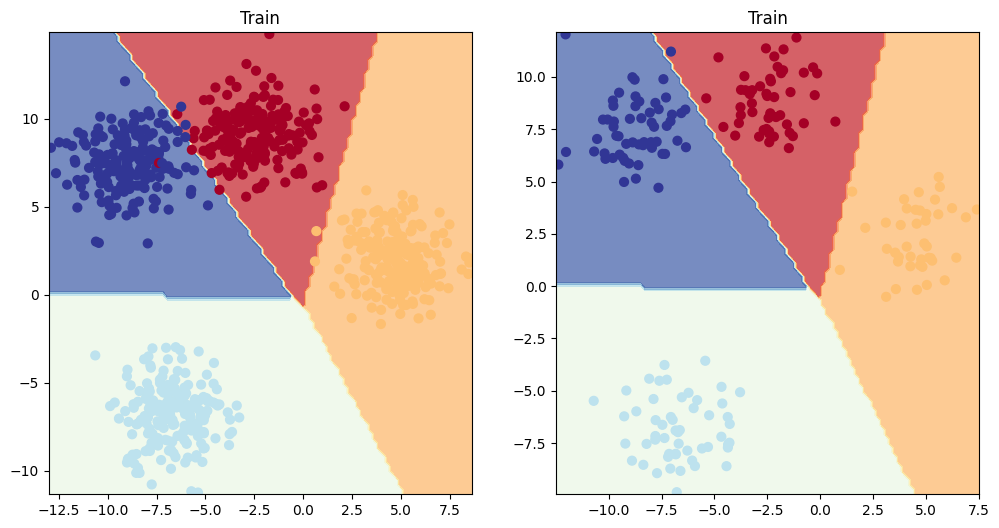

In [248]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [249]:
pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.


In [263]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task='multiclass').to(device)

torchmetric_accuracy(y_preds, y_blob_train)

AssertionError: 